In [ ]:
pip install utils

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:

#Load all data from bacth 1 untul 5
data_batch_1 = pd.read_csv(r'/content/sample_data/data_batch_1.csv')
data_batch_2 = pd.read_csv(r'/content/sample_data/data_batch_2.csv')
data_batch_3 = pd.read_csv(r'/content/sample_data/data_batch_3.csv')
data_batch_4 = pd.read_csv(r'/content/sample_data/data_batch_4.csv')
data_batch_5 = pd.read_csv(r'/content/sample_data/data_batch_5.csv')
data_batch_6 = pd.read_csv(r'/content/sample_data/data_batch_6.csv')

#general information data
data_general = pd.read_csv(r'/content/sample_data/influencer_names_final.csv')

In [ ]:
#concat all data
data_detail = pd.concat([data_batch_1,
           data_batch_2,
           data_batch_3,
           data_batch_4,
           data_batch_5,
           data_batch_6],
          ignore_index=True)

In [ ]:
#join with general data
df = pd.merge(data_detail, data_general, how='left')

In [ ]:
df['dates'] = df['dates'].apply(lambda x: dt.datetime.fromtimestamp(x).strftime('%Y-%m-%d-%H'))


In [ ]:
#top 5 our data
df.head()

,link,likes,comment_counts,dates,captions,type_posts,username,following,post,followers
0,https://www.instagram.com/p/CCXR2t6BN_6/,154552,0,2020-07-08-02,"•\nWho Said We Are Old...No We Are Blessed,\n....",GraphImage,princessyahrini,649,4769,33500000
1,https://www.instagram.com/p/CCNHaLhBndL/,52771,9,2020-07-04-03,“ How We Miss Tokyo So Much “\n\n_____________...,GraphVideo,princessyahrini,649,4769,33500000
2,https://www.instagram.com/p/CCFU-mFhKJi/,97386,0,2020-07-01-02,"•\nOh...Hi July,\nGood Morning !\n\n__________...",GraphImage,princessyahrini,649,4769,33500000
3,https://www.instagram.com/p/CCDUy0rhY4U/,43953,5,2020-06-30-08,"From Our Honeymoon,\nSummer 2019 !\n\n________...",GraphVideo,princessyahrini,649,4769,33500000
4,https://www.instagram.com/p/CB4WqVRBAOP/,145632,0,2020-06-26-01,•\nSelamat pagi !\n\n__________________ 𝓢𝓨𝓡___...,GraphImage,princessyahrini,649,4769,33500000


In [ ]:
print(df['dates'].min())
print(df['dates'].max())

2014-12-01-16
2020-07-12-13


In [ ]:
df['captions'] = df['captions'].replace(r'[\n]', '', regex=True)
df.isnull().sum()
df['captions'] = df['captions'].fillna('No Captions')

#separte for future use
df['year'] = df['dates'].apply(lambda x: x[:4])
df['month'] = df['dates'].apply(lambda x: x[5:7])
df['day'] = df['dates'].apply(lambda x: x[8:10])
df['hour'] = df['dates'].apply(lambda x: x[11:])

#create year_month features
df['year_month'] = df['year'] + df['month']


#because the count of post before 2018 is small, we only filter post that >= 2018
#and our objective is to predict avg engagment rate in July 2020, so we must exclude July 2020 too.
df_2 = df[df['year']>='2018'].reset_index(drop=True)
df_3 = df_2[df_2['year_month']!='202007'].reset_index(drop=True)


df_3['likes_engagment'] = df_3['likes'] / df_3['followers'] * 100
df_3['comments_engagemeent'] = df_3['comment_counts'] / df_3['followers'] * 100

df_3

,link,likes,comment_counts,dates,captions,type_posts,username,following,post,followers,year,month,day,hour,year_month,likes_engagment,comments_engagemeent
0,https://www.instagram.com/p/CCDUy0rhY4U/,43953,5,2020-06-30-08,"From Our Honeymoon,Summer 2019 !______________...",GraphVideo,princessyahrini,649,4769,33500000,2020,06,30,08,202006,0.131203,0.000015
1,https://www.instagram.com/p/CB4WqVRBAOP/,145632,0,2020-06-26-01,•Selamat pagi !__________________ 𝓢𝓨𝓡_________...,GraphImage,princessyahrini,649,4769,33500000,2020,06,26,01,202006,0.434722,0.000000
2,https://www.instagram.com/p/CB0IFkKh0Py/,79662,65,2020-06-24-10,“ I HAVE NOTHING “_________________ 𝓢𝓨𝓡_______...,GraphVideo,princessyahrini,649,4769,33500000,2020,06,24,10,202006,0.237797,0.000194
3,https://www.instagram.com/p/CBzudkKBc5v/,76461,0,2020-06-24-06,•A Day Well Spent With My Beautiful Soul Siste...,GraphImage,princessyahrini,649,4769,33500000,2020,06,24,06,202006,0.228242,0.000000
4,https://www.instagram.com/p/CBvH-ZaB5c5/,141927,0,2020-06-22-11,"•Alhamdulillah,Amin Allahuma Amin ... Amin Ya ...",GraphVideo,princessyahrini,649,4769,33500000,2020,06,22,11,202006,0.423663,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52715,https://www.instagram.com/p/B4EAT6plYBa/,627,2,2019-10-26-01,Perjalanan ini adalah sebuah prosesMencariMeng...,GraphVideo,riamiranda,532,2227,845000,2019,10,26,01,201910,0.074201,0.000237
52716,https://www.instagram.com/p/B4DsRzAl2Qh/,13287,146,2019-10-25-22,Aku pengen cerita tentang lelaki sebelahku yan...,GraphSidecar,riamiranda,532,2227,845000,2019,10,25,22,201910,1.572426,0.017278
52717,https://www.instagram.com/p/B4C5qCbFeVE/,5180,39,2019-10-25-14,Melewati linimasa 10 tahun perjalanan sebagai ...,GraphSidecar,riamiranda,532,2227,845000,2019,10,25,14,201910,0.613018,0.004615
52718,https://www.instagram.com/p/B3_Cfg7FC8h/,574,11,2019-10-24-02,Bismillah.. Manusia hanya bisa berusaha dan be...,GraphVideo,riamiranda,532,2227,845000,2019,10,24,02,201910,0.067929,0.001302


In [ ]:
df_3['total_engagement'] =  df_3['comments_engagemeent'] + df_3['likes_engagment']

#make lower case
df_3['captions'] = df_3['captions'].str.lower()

#delete whitespace
df_3['captions'] = df_3['captions'].str.strip()
#feature length of captions
df_3['len_capt'] = df_3['captions'].apply(lambda x: len(x))

#create feature length of captions without punctuation
df_3['len_capt_wo_punct'] = df_3['captions'].str.replace(r'[^\w\s]', '', regex=True).apply(lambda x: len(x))

#feature length of punctuation only
df_3['len_capt_punct'] = df_3['captions'].str.replace(r'[\w\s]', '', regex=True).apply(lambda x: len(x))
#feature number of words in each captions
df_3['n_words'] = df_3['captions'].apply(lambda x: len(str(x).split(" ")))

#average char per words
df_3['avg_char_words'] = df_3['n_words'] / df_3['len_capt']

#number of numeric char in captions
df_3['n_numeric'] = df_3['captions'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df_3

,link,likes,comment_counts,dates,captions,type_posts,username,following,post,followers,year,month,day,hour,year_month,likes_engagment,comments_engagemeent,total_engagement,len_capt,len_capt_wo_punct,len_capt_punct,n_words,avg_char_words,n_numeric
0,https://www.instagram.com/p/CCDUy0rhY4U/,43953,5,2020-06-30-08,"from our honeymoon,summer 2019 !______________...",GraphVideo,princessyahrini,649,4769,33500000,2020,06,30,08,202006,0.131203,0.000015,0.131218,81,78,3,6,0.074074,1
1,https://www.instagram.com/p/CB4WqVRBAOP/,145632,0,2020-06-26-01,•selamat pagi !__________________ 𝓢𝓨𝓡_________...,GraphImage,princessyahrini,649,4769,33500000,2020,06,26,01,202006,0.434722,0.000000,0.434722,72,69,3,4,0.055556,0
2,https://www.instagram.com/p/CB0IFkKh0Py/,79662,65,2020-06-24-10,“ i have nothing “_________________ 𝓢𝓨𝓡_______...,GraphVideo,princessyahrini,649,4769,33500000,2020,06,24,10,202006,0.237797,0.000194,0.237991,71,68,3,6,0.084507,0
3,https://www.instagram.com/p/CBzudkKBc5v/,76461,0,2020-06-24-06,•a day well spent with my beautiful soul siste...,GraphImage,princessyahrini,649,4769,33500000,2020,06,24,06,202006,0.228242,0.000000,0.228242,230,219,11,23,0.100000,0
4,https://www.instagram.com/p/CBvH-ZaB5c5/,141927,0,2020-06-22-11,"•alhamdulillah,amin allahuma amin ... amin ya ...",GraphVideo,princessyahrini,649,4769,33500000,2020,06,22,11,202006,0.423663,0.000000,0.423663,115,108,7,9,0.078261,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52715,https://www.instagram.com/p/B4EAT6plYBa/,627,2,2019-10-26-01,perjalanan ini adalah sebuah prosesmencarimeng...,GraphVideo,riamiranda,532,2227,845000,2019,10,26,01,201910,0.074201,0.000237,0.074438,536,530,6,62,0.115672,2
52716,https://www.instagram.com/p/B4DsRzAl2Qh/,13287,146,2019-10-25-22,aku pengen cerita tentang lelaki sebelahku yan...,GraphSidecar,riamiranda,532,2227,845000,2019,10,25,22,201910,1.572426,0.017278,1.589704,1405,1360,45,213,0.151601,5
52717,https://www.instagram.com/p/B4C5qCbFeVE/,5180,39,2019-10-25-14,melewati linimasa 10 tahun perjalanan sebagai ...,GraphSidecar,riamiranda,532,2227,845000,2019,10,25,14,201910,0.613018,0.004615,0.617633,724,696,28,95,0.131215,4
52718,https://www.instagram.com/p/B3_Cfg7FC8h/,574,11,2019-10-24-02,bismillah.. manusia hanya bisa berusaha dan be...,GraphVideo,riamiranda,532,2227,845000,2019,10,24,02,201910,0.067929,0.001302,0.069231,1025,981,44,122,0.119024,2


In [ ]:
df_3.to_csv('data_preprocessing_1.csv', index=False)

Data Preprocessing Done!!!

# Feature Engineering

create base table

In [ ]:
df = pd.read_csv(r'/content/sample_data/data_preprocessing.csv')

In [ ]:
#Creating dataframe conatining user name and number of posts according to year and month
base_table = df.groupby(['username', 'year_month']).agg({        #groupby function
    'link' : 'count'
}).reset_index().rename(columns={                                #renaming the column
    'link' : 'n_post'
})

In [ ]:
base_table.to_csv('baseTable.csv', index=False)


Lag features are the classical way that time series forecasting problems are transformed into supervised learning problems.

 The Pandas library provides the shift() function to help create these shifted or lag features from a time series dataset. Shifting the dataset by 1 creates the t-1 column, adding a NaN (unknown) value for the first row. The time series dataset without a shift represents the t+1.
 
 Shifted, Original
NaN, 20.7
20.7, 17.9
17.9, 18.8
 

In [ ]:
#create features lag of n_post (last 3 month)
#number of n_post 1 months ago
base_table['n_post_01'] = base_table.groupby(['username'])['n_post'].shift(1).fillna(0)

#number of n_post 2 months ago
base_table['n_post_02'] = base_table.groupby(['username'])['n_post'].shift(2).fillna(0)

#number of n_post 3 months ago
base_table['n_post_03'] = base_table.groupby(['username'])['n_post'].shift(3).fillna(0)

In [ ]:
base_table

,username,year_month,n_post,n_post_01,n_post_02,n_post_03
0,1milliondance,201906,1,0.0,0.0,0.0
1,1milliondance,201907,9,1.0,0.0,0.0
2,1milliondance,201908,11,9.0,1.0,0.0
3,1milliondance,201909,2,11.0,9.0,1.0
4,1milliondance,201910,5,2.0,11.0,9.0
...,...,...,...,...,...,...
4355,zoeabbasjackson,202002,12,4.0,5.0,5.0
4356,zoeabbasjackson,202003,10,12.0,4.0,5.0
4357,zoeabbasjackson,202004,5,10.0,12.0,4.0
4358,zoeabbasjackson,202005,6,5.0,10.0,12.0


Feature type_posts

In [ ]:
df_type_post = df.groupby(['username', 'year_month'])['type_posts'].value_counts().unstack(2).reset_index().fillna(0)  #grouping username and year_month and finidng type of posts acc to that

In [ ]:
df_type_post

type_posts,username,year_month,GraphImage,GraphSidecar,GraphVideo
0,1milliondance,201906,0.0,1.0,0.0
1,1milliondance,201907,6.0,1.0,2.0
2,1milliondance,201908,5.0,2.0,4.0
3,1milliondance,201909,0.0,1.0,1.0
4,1milliondance,201910,3.0,2.0,0.0
...,...,...,...,...,...
4355,zoeabbasjackson,202002,4.0,4.0,4.0
4356,zoeabbasjackson,202003,5.0,0.0,5.0
4357,zoeabbasjackson,202004,4.0,0.0,1.0
4358,zoeabbasjackson,202005,2.0,2.0,2.0


#Adding them to base table

In [ ]:
base_table['n_img_post'] = df_type_post['GraphImage']
base_table['n_vid_post'] = df_type_post['GraphVideo']
base_table['n_sidecar_post'] = df_type_post['GraphSidecar']

Feature Likes

In [ ]:
#create features sum, avg and stdev of likes
base_table['sum_likes'] = df.groupby(['username', 'year_month'])['likes'].sum().reset_index()['likes']              #Sum of all Likes
base_table['avg_likes'] = df.groupby(['username', 'year_month'])['likes'].mean().reset_index()['likes']             #Average likes
base_table['std_likes'] = df.groupby(['username', 'year_month'])['likes'].std().reset_index()['likes'].fillna(0)     #Standard deviation of likes

In [ ]:
base_table

,username,year_month,n_post,n_post_01,n_post_02,n_post_03,n_img_post,n_vid_post,n_sidecar_post,sum_likes,avg_likes,std_likes
0,1milliondance,201906,1,0.0,0.0,0.0,0.0,0.0,1.0,29763,29763.000000,0.000000
1,1milliondance,201907,9,1.0,0.0,0.0,6.0,2.0,1.0,209598,23288.666667,15705.132250
2,1milliondance,201908,11,9.0,1.0,0.0,5.0,4.0,2.0,193379,17579.909091,6093.849825
3,1milliondance,201909,2,11.0,9.0,1.0,0.0,1.0,1.0,41838,20919.000000,15655.344135
4,1milliondance,201910,5,2.0,11.0,9.0,3.0,0.0,2.0,89894,17978.800000,2504.253522
...,...,...,...,...,...,...,...,...,...,...,...,...
4355,zoeabbasjackson,202002,12,4.0,5.0,5.0,4.0,4.0,4.0,1262483,105206.916667,48387.863100
4356,zoeabbasjackson,202003,10,12.0,4.0,5.0,5.0,5.0,0.0,1297629,129762.900000,69701.212196
4357,zoeabbasjackson,202004,5,10.0,12.0,4.0,4.0,1.0,0.0,743141,148628.200000,13655.505106
4358,zoeabbasjackson,202005,6,5.0,10.0,12.0,2.0,2.0,2.0,694506,115751.000000,53938.246609


In [ ]:
#create features lag of sum_likes and mean_likes (last 3 month)
base_table['avg_likes_01'] = base_table.groupby(['username'])['avg_likes'].shift(1).fillna(0)
base_table['avg_likes_02'] = base_table.groupby(['username'])['avg_likes'].shift(2).fillna(0)
base_table['avg_likes_03'] = base_table.groupby(['username'])['avg_likes'].shift(3).fillna(0)

base_table['sum_likes_01'] = base_table.groupby(['username'])['sum_likes'].shift(1).fillna(0)
base_table['sum_likes_02'] = base_table.groupby(['username'])['sum_likes'].shift(2).fillna(0)
base_table['sum_likes_03'] = base_table.groupby(['username'])['sum_likes'].shift(3).fillna(0)

In [ ]:
base_table

,username,year_month,n_post,n_post_01,n_post_02,n_post_03,n_img_post,n_vid_post,n_sidecar_post,sum_likes,avg_likes,std_likes,avg_likes_01,avg_likes_02,avg_likes_03,sum_likes_01,sum_likes_02,sum_likes_03
0,1milliondance,201906,1,0.0,0.0,0.0,0.0,0.0,1.0,29763,29763.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1milliondance,201907,9,1.0,0.0,0.0,6.0,2.0,1.0,209598,23288.666667,15705.132250,29763.000000,0.000000,0.000000,29763.0,0.0,0.0
2,1milliondance,201908,11,9.0,1.0,0.0,5.0,4.0,2.0,193379,17579.909091,6093.849825,23288.666667,29763.000000,0.000000,209598.0,29763.0,0.0
3,1milliondance,201909,2,11.0,9.0,1.0,0.0,1.0,1.0,41838,20919.000000,15655.344135,17579.909091,23288.666667,29763.000000,193379.0,209598.0,29763.0
4,1milliondance,201910,5,2.0,11.0,9.0,3.0,0.0,2.0,89894,17978.800000,2504.253522,20919.000000,17579.909091,23288.666667,41838.0,193379.0,209598.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,zoeabbasjackson,202002,12,4.0,5.0,5.0,4.0,4.0,4.0,1262483,105206.916667,48387.863100,76610.250000,128589.000000,105608.400000,306441.0,642945.0,528042.0
4356,zoeabbasjackson,202003,10,12.0,4.0,5.0,5.0,5.0,0.0,1297629,129762.900000,69701.212196,105206.916667,76610.250000,128589.000000,1262483.0,306441.0,642945.0
4357,zoeabbasjackson,202004,5,10.0,12.0,4.0,4.0,1.0,0.0,743141,148628.200000,13655.505106,129762.900000,105206.916667,76610.250000,1297629.0,1262483.0,306441.0
4358,zoeabbasjackson,202005,6,5.0,10.0,12.0,2.0,2.0,2.0,694506,115751.000000,53938.246609,148628.200000,129762.900000,105206.916667,743141.0,1297629.0,1262483.0


Feature Comments

In [ ]:
#create features sum, avg and stdev of comments
base_table['sum_comments'] = df.groupby(['username', 'year_month'])['comment_counts'].sum().reset_index()['comment_counts']     #Total no of comments
base_table['avg_comments'] = df.groupby(['username', 'year_month'])['comment_counts'].mean().reset_index()['comment_counts']    #Average number
base_table['std_comments'] = df.groupby(['username', 'year_month'])['comment_counts'].std().reset_index()['comment_counts'].fillna(0)  #Standard deviation

In [ ]:
#create features lag of sum_comments and mean_comments (last 3 month)
base_table['avg_comments_01'] = base_table.groupby(['username'])['avg_comments'].shift(1).fillna(0)
base_table['avg_comments_02'] = base_table.groupby(['username'])['avg_comments'].shift(2).fillna(0)
base_table['avg_comments_03'] = base_table.groupby(['username'])['avg_comments'].shift(3).fillna(0)

base_table['sum_comments_01'] = base_table.groupby(['username'])['sum_comments'].shift(1).fillna(0)
base_table['sum_comments_02'] = base_table.groupby(['username'])['sum_comments'].shift(2).fillna(0)
base_table['sum_comments_03'] = base_table.groupby(['username'])['sum_comments'].shift(3).fillna(0)

Features Captions

In [ ]:
#create features sum, avg and stdev of captions_wo_punct
base_table['sum_capt_wo_punct'] = df.groupby(['username', 'year_month'])['len_capt_wo_punct'].sum().reset_index()['len_capt_wo_punct']                 #Total Number of captions without punctuation
base_table['avg_capt_wo_punct'] = df.groupby(['username', 'year_month'])['len_capt_wo_punct'].mean().reset_index()['len_capt_wo_punct']                #Average no  of captions without punctuation
base_table['std_capt_wo_punct'] = df.groupby(['username', 'year_month'])['len_capt_wo_punct'].std().reset_index()['len_capt_wo_punct'].fillna(0)       #Standard Devation of captions without punctuation

#create features sum, avg and stdev of captions_w_punct
base_table['sum_capt_w_punct'] = df.groupby(['username', 'year_month'])['len_capt_punct'].sum().reset_index()['len_capt_punct']                 #Total number of captions with punctuation
base_table['avg_capt_w_punct'] = df.groupby(['username', 'year_month'])['len_capt_punct'].mean().reset_index()['len_capt_punct']                #Average no  of captions with punctuation
base_table['std_capt_w_punct'] = df.groupby(['username', 'year_month'])['len_capt_punct'].std().reset_index()['len_capt_punct'].fillna(0)       #Standard Devation of captions with punctuation

#create features sum, avg and stdev of n_words
base_table['sum_n_words'] = df.groupby(['username', 'year_month'])['n_words'].sum().reset_index()['n_words']
base_table['avg_n_words'] = df.groupby(['username', 'year_month'])['n_words'].mean().reset_index()['n_words']
base_table['std_n_words'] = df.groupby(['username', 'year_month'])['n_words'].std().reset_index()['n_words'].fillna(0)

#create features sum, avg and stdev of avg_char_words
base_table['sum_avg_char_words'] = df.groupby(['username', 'year_month'])['avg_char_words'].sum().reset_index()['avg_char_words']
base_table['avg_avg_char_words'] = df.groupby(['username', 'year_month'])['avg_char_words'].mean().reset_index()['avg_char_words']
base_table['std_avg_char_words'] = df.groupby(['username', 'year_month'])['avg_char_words'].std().reset_index()['avg_char_words'].fillna(0)

In [ ]:
#create features lag of captions (last 3 month)
base_table['sum_capt_wo_punct_01'] = base_table.groupby(['username'])['sum_capt_wo_punct'].shift(1).fillna(0)
base_table['sum_capt_wo_punct_02'] = base_table.groupby(['username'])['sum_capt_wo_punct'].shift(2).fillna(0)
base_table['sum_capt_wo_punct_03'] = base_table.groupby(['username'])['sum_capt_wo_punct'].shift(3).fillna(0)

base_table['sum_capt_w_punct_01'] = base_table.groupby(['username'])['sum_capt_w_punct'].shift(1).fillna(0)
base_table['sum_capt_w_punct_02'] = base_table.groupby(['username'])['sum_capt_w_punct'].shift(2).fillna(0)
base_table['sum_capt_w_punct_03'] = base_table.groupby(['username'])['sum_capt_w_punct'].shift(3).fillna(0)

base_table['sum_n_words_01'] = base_table.groupby(['username'])['sum_n_words'].shift(1).fillna(0)
base_table['sum_n_words_02'] = base_table.groupby(['username'])['sum_n_words'].shift(2).fillna(0)
base_table['sum_n_words_03'] = base_table.groupby(['username'])['sum_n_words'].shift(3).fillna(0)

base_table['sum_avg_char_words_01'] = base_table.groupby(['username'])['sum_avg_char_words'].shift(1).fillna(0)
base_table['sum_avg_char_words_02'] = base_table.groupby(['username'])['sum_avg_char_words'].shift(2).fillna(0)
base_table['sum_avg_char_words_03'] = base_table.groupby(['username'])['sum_avg_char_words'].shift(3).fillna(0)

In [ ]:
base_table['sum_n_numeric'] = df.groupby(['username', 'year_month'])['n_numeric'].sum().reset_index()['n_numeric']     

Feature Engagement

In [ ]:
#create features sum and avg engagement
base_table['sum_likes_engagement'] = df.groupby(['username', 'year_month'])['likes_engagement'].sum().reset_index()['likes_engagement']
base_table['sum_comments_engagement'] = df.groupby(['username', 'year_month'])['comments_engagement'].sum().reset_index()['comments_engagement']
base_table['sum_total_engagement'] = df.groupby(['username', 'year_month'])['total_engagement'].sum().reset_index()['total_engagement']

base_table['avg_likes_engagement'] = df.groupby(['username', 'year_month'])['likes_engagement'].mean().reset_index()['likes_engagement']
base_table['avg_comments_engagement'] = df.groupby(['username', 'year_month'])['comments_engagement'].mean().reset_index()['comments_engagement']
base_table['avg_total_engagement'] = df.groupby(['username', 'year_month'])['total_engagement'].mean().reset_index()['total_engagement']

In [ ]:
#create features lag of engagement (last 3 month)
base_table['avg_total_engagement_01'] = base_table.groupby(['username'])['avg_total_engagement'].shift(1).fillna(0)
base_table['avg_total_engagement_02'] = base_table.groupby(['username'])['avg_total_engagement'].shift(2).fillna(0)
base_table['avg_total_engagement_03'] = base_table.groupby(['username'])['avg_total_engagement'].shift(3).fillna(0)

# Target Variable

In [ ]:
#Create our target Variable
base_table['y_month_01'] = base_table.groupby(['username'])['avg_total_engagement'].shift(-1).fillna(0)

In [ ]:
base_table          #Final table which we have got after feature Engineering

,username,year_month,n_post,n_post_01,n_post_02,n_post_03,n_img_post,n_vid_post,n_sidecar_post,sum_likes,avg_likes,std_likes,avg_likes_01,avg_likes_02,avg_likes_03,sum_likes_01,sum_likes_02,sum_likes_03,sum_comments,avg_comments,std_comments,avg_comments_01,avg_comments_02,avg_comments_03,sum_comments_01,sum_comments_02,sum_comments_03,sum_capt_wo_punct,avg_capt_wo_punct,std_capt_wo_punct,sum_capt_w_punct,avg_capt_w_punct,std_capt_w_punct,sum_n_words,avg_n_words,std_n_words,sum_avg_char_words,avg_avg_char_words,std_avg_char_words,sum_capt_wo_punct_01,sum_capt_wo_punct_02,sum_capt_wo_punct_03,sum_capt_w_punct_01,sum_capt_w_punct_02,sum_capt_w_punct_03,sum_n_words_01,sum_n_words_02,sum_n_words_03,sum_avg_char_words_01,sum_avg_char_words_02,sum_avg_char_words_03,sum_n_numeric,sum_likes_engagement,sum_comments_engagement,sum_total_engagement,avg_likes_engagement,avg_comments_engagement,avg_total_engagement,avg_total_engagement_01,avg_total_engagement_02,avg_total_engagement_03,y_month_01
0,1milliondance,201906,1,0.0,0.0,0.0,0.0,0.0,1.0,29763,29763.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,47,47.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,59,59.000000,0.000000,3,3.000000,0.000000,8,8.000000,0.000000,0.129032,0.129032,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,2.289462,0.003615,2.293077,2.289462,0.003615,2.293077,0.000000,0.000000,0.000000,1.793402
1,1milliondance,201907,9,1.0,0.0,0.0,6.0,2.0,1.0,209598,23288.666667,15705.132250,29763.000000,0.000000,0.000000,29763.0,0.0,0.0,230,25.555556,14.552587,47.000000,0.000000,0.000000,47.0,0.0,0.0,724,80.444444,33.211862,47,5.222222,2.108185,114,12.666667,7.106335,1.270923,0.141214,0.028321,59.0,0.0,0.0,3.0,0.0,0.0,8.0,0.0,0.0,0.129032,0.000000,0.000000,0,16.122923,0.017692,16.140615,1.791436,0.001966,1.793402,2.293077,0.000000,0.000000,1.354944
2,1milliondance,201908,11,9.0,1.0,0.0,5.0,4.0,2.0,193379,17579.909091,6093.849825,23288.666667,29763.000000,0.000000,209598.0,29763.0,0.0,378,34.363636,27.292023,25.555556,47.000000,0.000000,230.0,47.0,0.0,907,82.454545,56.196732,74,6.727273,7.862454,149,13.545455,8.594925,1.677293,0.152481,0.029048,724.0,59.0,0.0,47.0,3.0,0.0,114.0,8.0,0.0,1.270923,0.129032,0.000000,2,14.875308,0.029077,14.904385,1.352301,0.002643,1.354944,1.793402,2.293077,0.000000,1.610500
3,1milliondance,201909,2,11.0,9.0,1.0,0.0,1.0,1.0,41838,20919.000000,15655.344135,17579.909091,23288.666667,29763.000000,193379.0,209598.0,29763.0,35,17.500000,21.920310,34.363636,25.555556,47.000000,378.0,230.0,47.0,51,25.500000,6.363961,5,2.500000,0.707107,5,2.500000,0.707107,0.177866,0.088933,0.002795,907.0,724.0,59.0,74.0,47.0,3.0,149.0,114.0,8.0,1.677293,1.270923,0.129032,0,3.218308,0.002692,3.221000,1.609154,0.001346,1.610500,1.354944,1.793402,2.293077,1.384108
4,1milliondance,201910,5,2.0,11.0,9.0,3.0,0.0,2.0,89894,17978.800000,2504.253522,20919.000000,17579.909091,23288.666667,41838.0,193379.0,209598.0,73,14.600000,5.549775,17.500000,34.363636,25.555556,35.0,378.0,230.0,498,99.600000,30.533588,36,7.200000,2.489980,73,14.600000,4.335897,0.683875,0.136775,0.000317,51.0,907.0,724.0,5.0,74.0,47.0,5.0,149.0,114.0,0.177866,1.677293,1.270923,1,6.914923,0.005615,6.920538,1.382985,0.001123,1.384108,1.610500,1.354944,1.793402,1.012781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,zoeabbasjackson,202002,12,4.0,5.0,5.0,4.0,4.0,4.0,1262483,105206.916667,48387.863100,76610.250000,128589.000000,105608.400000,306441.0,642945.0,528042.0,5329,444.083333,487.669310,105.250000,536.400000,213.600000,421.0,2682.0,1068.0,908,75.666667,80.601526,87,7.250000,7.111131,173,14.416667,15.808274,2.073692,0.172808,0.025087,754.0,110.0,178.0,27.0,18.0,17.0,118.0,19.0,33.0,0.640979,0.851883,0.994161,4,128.995913,0.544498,129.540411,10.749659,0.045375,10.79503

In [ ]:
base_table.to_csv('data_feature_engineering.csv', index=False)

# Feature Engineering Completed

# Modelling

In [ ]:
#Importing necessary libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

import joblib

import warnings
warnings.filterwarnings('ignore')


In [ ]:
pip install fsspec

     |████████████████████████████████| 136 kB 7.7 MB/s 


In [ ]:

df = pd.read_csv(r'/content/data_feature_engineering.csv')

**Seaborn** is a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python. Visualization is the central part of Seaborn which helps in exploration and understanding of data.

A **heatmap** contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.

Heatmap is one good visualization technique used to compare any 2 variables/features with respective to the values. The heatmap from seaborn library will create a grid like plot along with an optional color bar. We provide a 2D input matrix with certain values on each element to the heatmap and it exactly reproduces the output plot in the same shape as that of input matrix and each tile are colored based on the values provided in each elements of matrix to their corresponding tile.

This can be much useful in cases where there will be a bigger matrix and we want to find which value is higher, lower and so on by simply looking at the different colour tones used.

A **correlation heatmap** is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column. The color of the cell is proportional to the number of measurements that match the dimensional value. This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data. A correlation heatmap, like a regular heatmap, is assisted by a colorbar making data easily readable and comprehensible.

Except for data all other attributes are optional and data obviously will be the data to be plotted.** The data here has to be passed with corr() method to generate a correlation heatmap.** Also, corr() itself eliminates columns which will be of no use while generating a correlation heatmap and selects those which can be used.
Syntax: seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, annot_kws=None, linewidths=0, linecolor=’white’, cbar=True, **kwargs)

**Important Parameters**

**data**: 2D dataset that can be coerced into an ndarray.
vmin, vmax: Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.
cmap: The mapping from data values to color space.
center: The value at which to center the colormap when plotting divergent data.
annot: If True, write the data value in each cell.
fmt: String formatting code to use when adding annotations.
linewidths: Width of the lines that will divide each cell.
linecolor: Color of the lines that will divide each cell.
cbar: Whether to draw a colorbar.

In [ ]:
df

,username,year_month,n_post,n_post_01,n_post_02,n_post_03,n_img_post,n_vid_post,n_sidecar_post,sum_likes,avg_likes,std_likes,avg_likes_01,avg_likes_02,avg_likes_03,sum_likes_01,sum_likes_02,sum_likes_03,sum_comments,avg_comments,std_comments,avg_comments_01,avg_comments_02,avg_comments_03,sum_comments_01,sum_comments_02,sum_comments_03,sum_capt_wo_punct,avg_capt_wo_punct,std_capt_wo_punct,sum_capt_w_punct,avg_capt_w_punct,std_capt_w_punct,sum_n_words,avg_n_words,std_n_words,sum_avg_char_words,avg_avg_char_words,std_avg_char_words,sum_capt_wo_punct_01,sum_capt_wo_punct_02,sum_capt_wo_punct_03,sum_capt_w_punct_01,sum_capt_w_punct_02,sum_capt_w_punct_03,sum_n_words_01,sum_n_words_02,sum_n_words_03,sum_avg_char_words_01,sum_avg_char_words_02,sum_avg_char_words_03,sum_n_numeric,sum_likes_engagement,sum_comments_engagement,sum_total_engagement,avg_likes_engagement,avg_comments_engagement,avg_total_engagement,avg_total_engagement_01,avg_total_engagement_02,avg_total_engagement_03,y_month_01
0,1milliondance,201906,1,0.0,0.0,0.0,0.0,0.0,1.0,29763,29763.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,47,47.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,59,59.000000,0.000000,3,3.000000,0.000000,8,8.000000,0.000000,0.129032,0.129032,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,2.289462,0.003615,2.293077,2.289462,0.003615,2.293077,0.000000,0.000000,0.000000,1.793402
1,1milliondance,201907,9,1.0,0.0,0.0,6.0,2.0,1.0,209598,23288.666667,15705.132250,29763.000000,0.000000,0.000000,29763.0,0.0,0.0,230,25.555556,14.552587,47.000000,0.000000,0.000000,47.0,0.0,0.0,724,80.444444,33.211862,47,5.222222,2.108185,114,12.666667,7.106335,1.270923,0.141214,0.028321,59.0,0.0,0.0,3.0,0.0,0.0,8.0,0.0,0.0,0.129032,0.000000,0.000000,0,16.122923,0.017692,16.140615,1.791436,0.001966,1.793402,2.293077,0.000000,0.000000,1.354944
2,1milliondance,201908,11,9.0,1.0,0.0,5.0,4.0,2.0,193379,17579.909091,6093.849825,23288.666667,29763.000000,0.000000,209598.0,29763.0,0.0,378,34.363636,27.292023,25.555556,47.000000,0.000000,230.0,47.0,0.0,907,82.454545,56.196732,74,6.727273,7.862454,149,13.545455,8.594925,1.677293,0.152481,0.029048,724.0,59.0,0.0,47.0,3.0,0.0,114.0,8.0,0.0,1.270923,0.129032,0.000000,2,14.875308,0.029077,14.904385,1.352301,0.002643,1.354944,1.793402,2.293077,0.000000,1.610500
3,1milliondance,201909,2,11.0,9.0,1.0,0.0,1.0,1.0,41838,20919.000000,15655.344135,17579.909091,23288.666667,29763.000000,193379.0,209598.0,29763.0,35,17.500000,21.920310,34.363636,25.555556,47.000000,378.0,230.0,47.0,51,25.500000,6.363961,5,2.500000,0.707107,5,2.500000,0.707107,0.177866,0.088933,0.002795,907.0,724.0,59.0,74.0,47.0,3.0,149.0,114.0,8.0,1.677293,1.270923,0.129032,0,3.218308,0.002692,3.221000,1.609154,0.001346,1.610500,1.354944,1.793402,2.293077,1.384108
4,1milliondance,201910,5,2.0,11.0,9.0,3.0,0.0,2.0,89894,17978.800000,2504.253522,20919.000000,17579.909091,23288.666667,41838.0,193379.0,209598.0,73,14.600000,5.549775,17.500000,34.363636,25.555556,35.0,378.0,230.0,498,99.600000,30.533588,36,7.200000,2.489980,73,14.600000,4.335897,0.683875,0.136775,0.000317,51.0,907.0,724.0,5.0,74.0,47.0,5.0,149.0,114.0,0.177866,1.677293,1.270923,1,6.914923,0.005615,6.920538,1.382985,0.001123,1.384108,1.610500,1.354944,1.793402,1.012781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,zoeabbasjackson,202002,12,4.0,5.0,5.0,4.0,4.0,4.0,1262483,105206.916667,48387.863100,76610.250000,128589.000000,105608.400000,306441.0,642945.0,528042.0,5329,444.083333,487.669310,105.250000,536.400000,213.600000,421.0,2682.0,1068.0,908,75.666667,80.601526,87,7.250000,7.111131,173,14.416667,15.808274,2.073692,0.172808,0.025087,754.0,110.0,178.0,27.0,18.0,17.0,118.0,19.0,33.0,0.640979,0.851883,0.994161,4,128.995913,0.544498,129.540411,10.749659,0.045375,10.79503

             username  year_month  n_post  n_post_01  n_post_02  n_post_03  \
0       1milliondance      201906       1        0.0        0.0        0.0   
1       1milliondance      201907       9        1.0        0.0        0.0   
2       1milliondance      201908      11        9.0        1.0        0.0   
3       1milliondance      201909       2       11.0        9.0        1.0   
4       1milliondance      201910       5        2.0       11.0        9.0   
...               ...         ...     ...        ...        ...        ...   
4294  zoeabbasjackson      202002      12        4.0        5.0        5.0   
4295  zoeabbasjackson      202003      10       12.0        4.0        5.0   
4296  zoeabbasjackson      202004       5       10.0       12.0        4.0   
4297  zoeabbasjackson      202005       6        5.0       10.0       12.0   
4298  zoeabbasjackson      202006       5        6.0        5.0       10.0   

      n_img_post  n_vid_post  n_sidecar_post  sum_likes      av

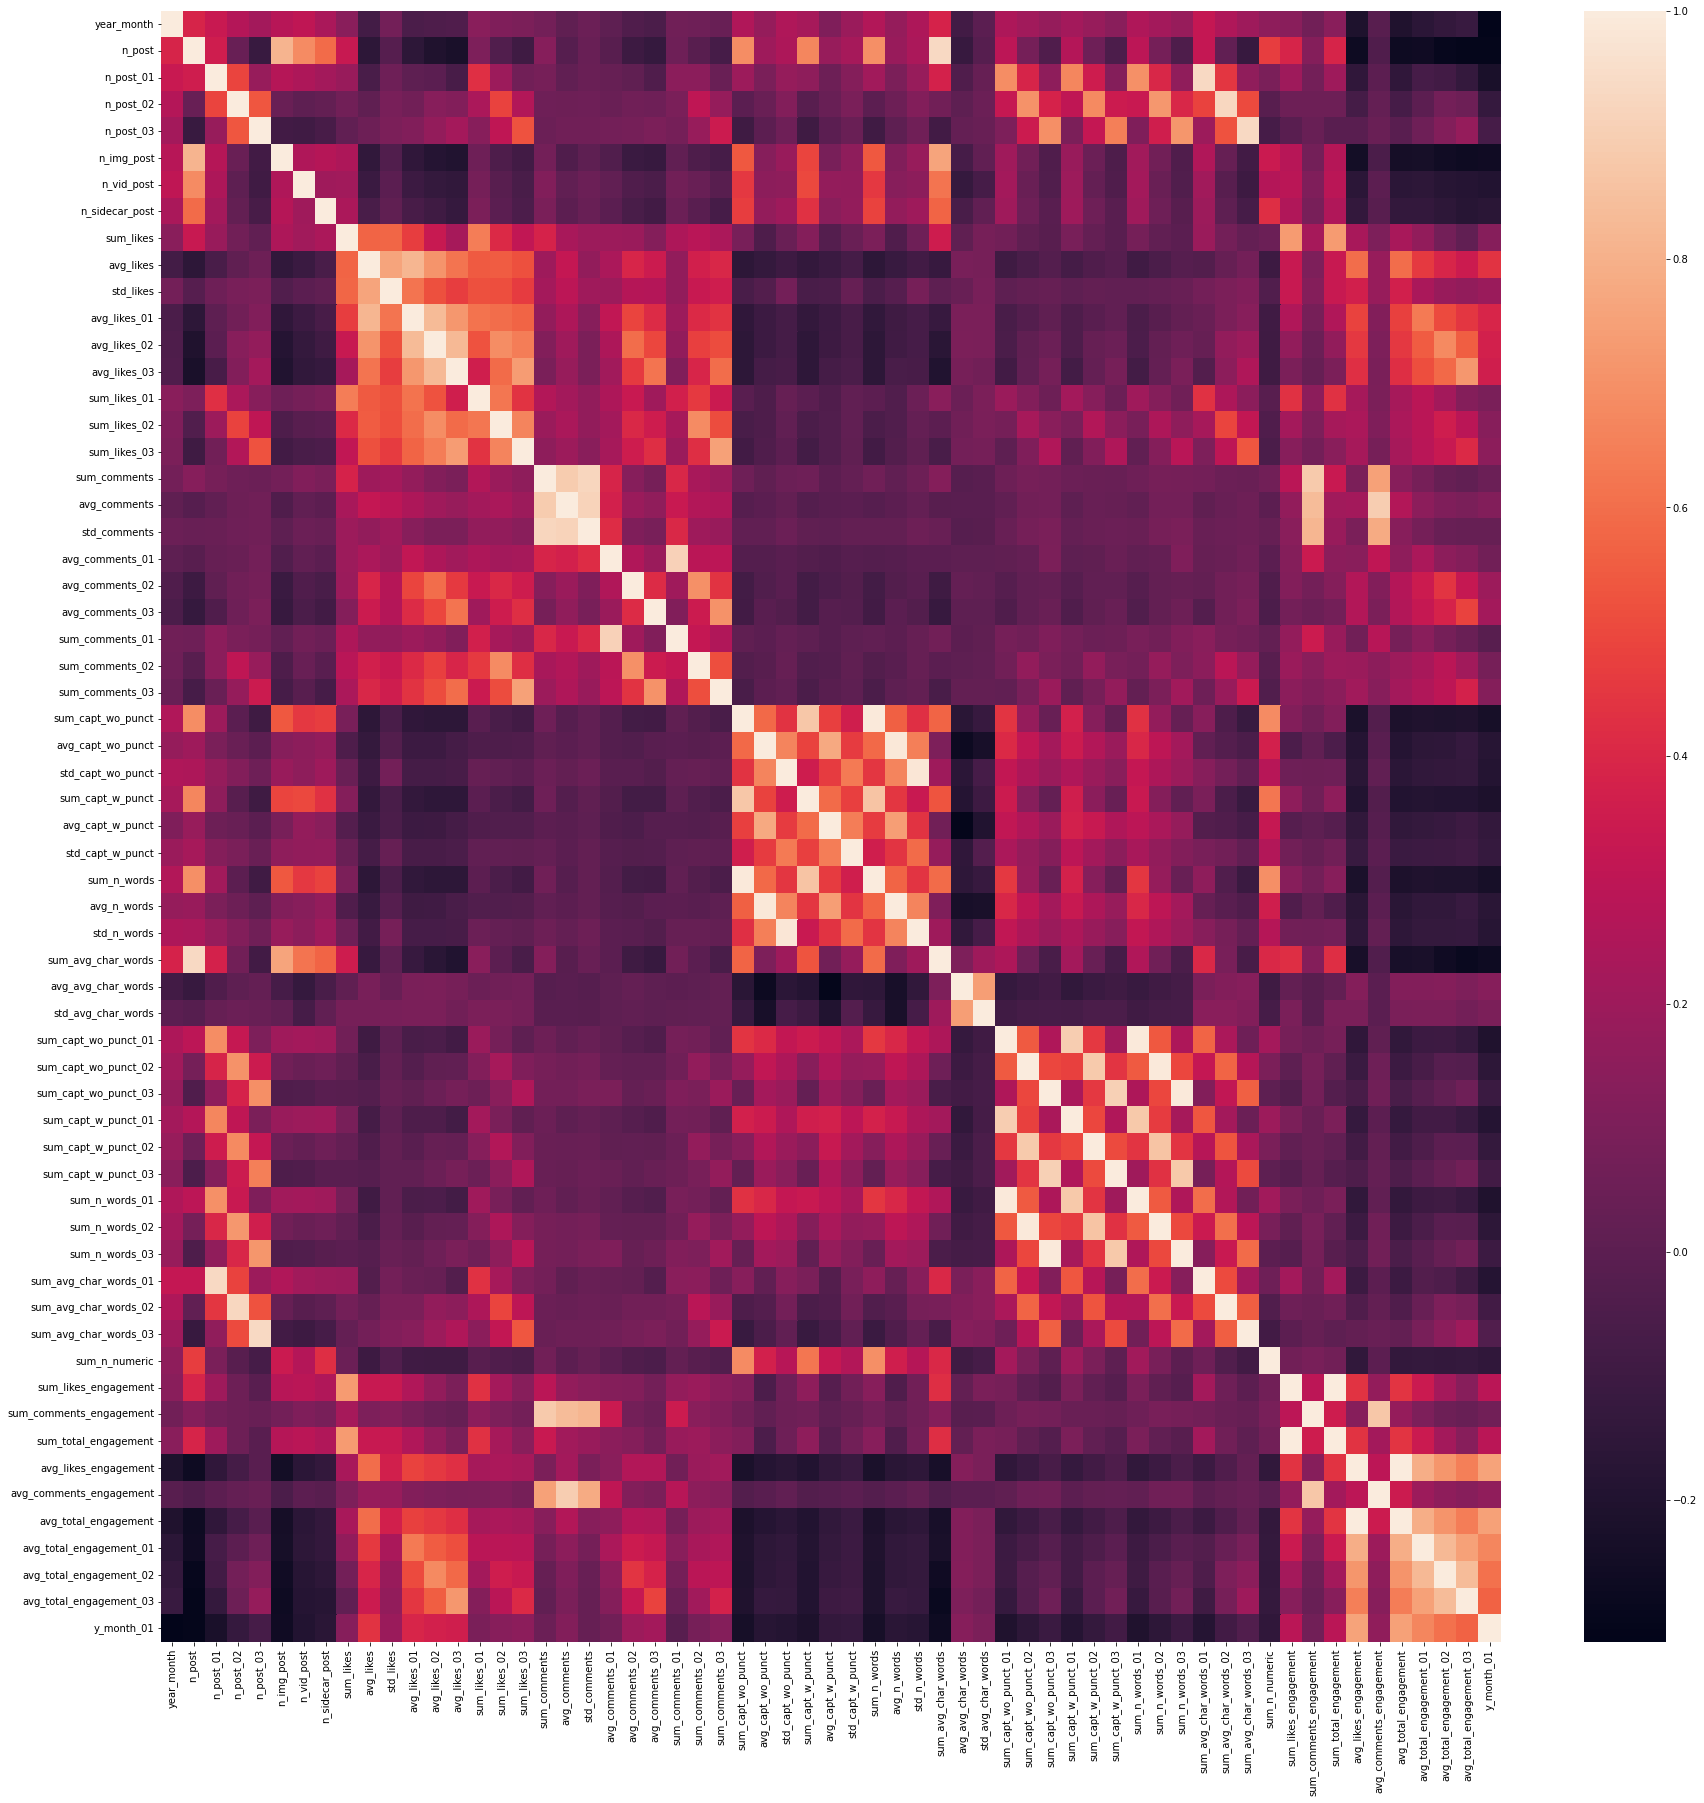

In [ ]:
#Plotting HeatMap to Compare features

#we choose variables with the value of correlation coefficient r < -0.2 and r > 0.3
#it is very subjective matter
print(df)
plt.figure(figsize=(30,30))
sns.heatmap(df.corr()); #,cmap="YlGnBu", annot=True
plt.show()

In [ ]:
numericfeatures = df.select_dtypes(include=[np.number])

print(numericfeatures.columns)

Index(['year_month', 'n_post', 'n_post_01', 'n_post_02', 'n_post_03',
       'n_img_post', 'n_vid_post', 'n_sidecar_post', 'sum_likes', 'avg_likes',
       'std_likes', 'avg_likes_01', 'avg_likes_02', 'avg_likes_03',
       'sum_likes_01', 'sum_likes_02', 'sum_likes_03', 'sum_comments',
       'avg_comments', 'std_comments', 'avg_comments_01', 'avg_comments_02',
       'avg_comments_03', 'sum_comments_01', 'sum_comments_02',
       'sum_comments_03', 'sum_capt_wo_punct', 'avg_capt_wo_punct',
       'std_capt_wo_punct', 'sum_capt_w_punct', 'avg_capt_w_punct',
       'std_capt_w_punct', 'sum_n_words', 'avg_n_words', 'std_n_words',
       'sum_avg_char_words', 'avg_avg_char_words', 'std_avg_char_words',
       'sum_capt_wo_punct_01', 'sum_capt_wo_punct_02', 'sum_capt_wo_punct_03',
       'sum_capt_w_punct_01', 'sum_capt_w_punct_02', 'sum_capt_w_punct_03',
       'sum_n_words_01', 'sum_n_words_02', 'sum_n_words_03',
       'sum_avg_char_words_01', 'sum_avg_char_words_02',
       'sum_avg_c

In [ ]:
correlation=numericfeatures.corr()
print(correlation['y_month_01'].sort_values(ascending=False),'\n')

y_month_01                 1.000000
avg_likes_engagement       0.757351
avg_total_engagement       0.753089
avg_total_engagement_01    0.671383
avg_total_engagement_02    0.608369
                             ...   
sum_n_words               -0.233753
n_img_post                -0.259883
sum_avg_char_words        -0.266711
n_post                    -0.300640
year_month                -0.314027
Name: y_month_01, Length: 61, dtype: float64 



In [ ]:
k=18
cols=correlation.nlargest(k,'y_month_01')['y_month_01'].index
print(cols)


Index(['y_month_01', 'avg_likes_engagement', 'avg_total_engagement',
       'avg_total_engagement_01', 'avg_total_engagement_02',
       'avg_total_engagement_03', 'avg_likes', 'avg_likes_01', 'avg_likes_02',
       'avg_likes_03', 'sum_likes_engagement', 'sum_total_engagement',
       'avg_comments_03', 'avg_comments_02', 'std_likes',
       'avg_comments_engagement', 'sum_likes_03', 'sum_likes_02'],
      dtype='object')


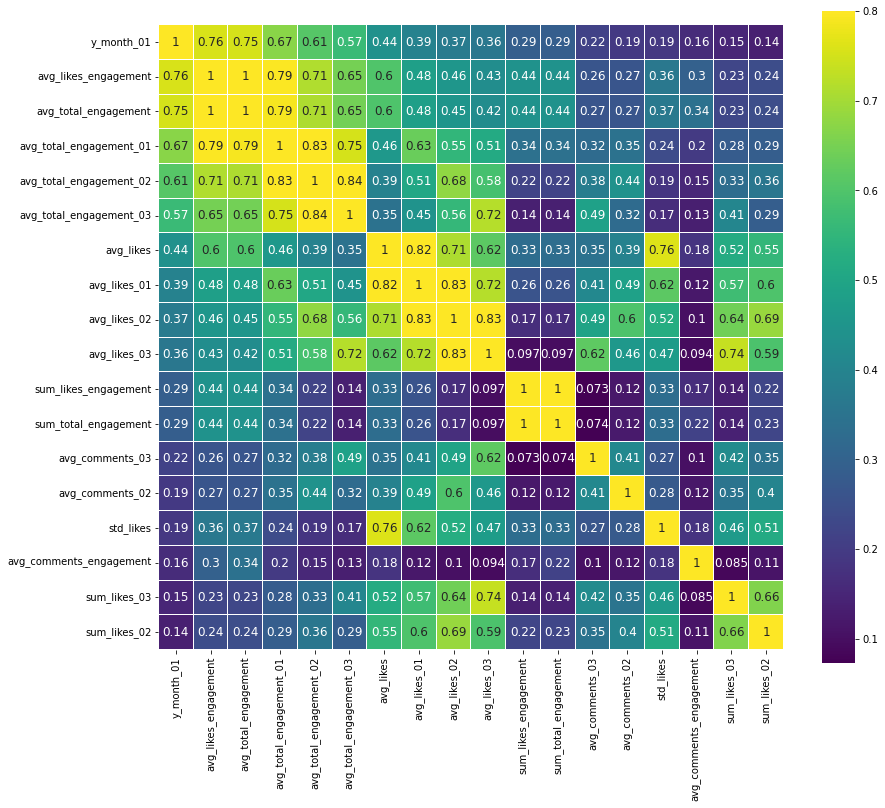

In [ ]:
cm=np.corrcoef(df[cols].values.T)
f,ax=plt.subplots(figsize = (14,12))
sns.heatmap(cm,vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',linecolor="white",xticklabels=cols.values,annot_kws={'size':12},yticklabels=cols.values)

In [ ]:
feature = ['username','y_month_01', 'avg_likes_engagement', 'avg_total_engagement',
       'avg_total_engagement_01', 'avg_total_engagement_02',
       'avg_total_engagement_03', 'avg_likes', 'avg_likes_01', 'avg_likes_02',
       'avg_likes_03', 'sum_likes_engagement', 'sum_total_engagement',
       'avg_comments_03', 'avg_comments_02', 'std_likes',
       'avg_comments_engagement', 'sum_likes_03', 'sum_likes_02']]   #19 features


In statistics, an **outlier is a data point that differs significantly from other observations**. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

Removing Outliers using Z-score technique

z-score (also called a standard score) gives you an idea of how far from the mean a data point is.
A z-score can be placed on a normal distribution curve. Z-scores range from -3 standard deviations (which would fall to the far left of the normal distribution curve) up to +3 standard deviations (which would fall to the far right of the normal distribution curve). In order to use a z-score, you need to know the mean μ and also the population standard deviation σ.

A z-score of 1 is 1 standard deviation above the mean.
A score of 2 is 2 standard deviations above the mean.
A score of -1.8 is -1.8 standard deviations below the mean.

#Plotting for Target variable y_month_01

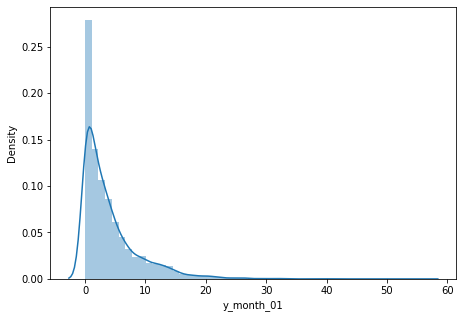

In [ ]:
#Plotting for y_month_01

import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['y_month_01'])

plt.show()

In [ ]:
print("Highest allowed",df['y_month_01'].mean() + 3*df['y_month_01'].std())  #std- standard deviation
print("Lowest allowed",df['y_month_01'].mean() - 3*df['y_month_01'].std())

#Here we found how much highest value is allowed

Highest allowed 18.320300800552417
Lowest allowed -10.19708638051637


In [ ]:
#remove outliers
df = df[df['y_month_01']<=20].reset_index(drop=True)

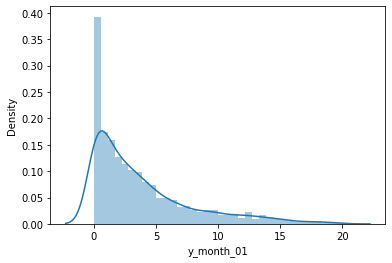

In [ ]:
sns.distplot(df['y_month_01'])

In [ ]:
df_w_feat = df[feature]
df_wo_feat = df.copy(deep=True) #When deep=True (default), a new object will be created with a copy of the calling object’s data and indices. 
                                #Modifications to the data or indices of the copy will not be reflected in the original object (see notes below).

In [ ]:
df_w_feat

,username,year_month,n_post,n_post_01,n_img_post,avg_likes,avg_likes_01,avg_likes_02,avg_likes_03,sum_capt_wo_punct,sum_n_words,sum_avg_char_words,sum_likes_engagement,sum_total_engagement,avg_likes_engagement,avg_total_engagement,avg_total_engagement_01,avg_total_engagement_02,avg_total_engagement_03,y_month_01
0,1milliondance,201906,1,0.0,0.0,29763.000000,0.000000,0.000000,0.000000,59,8,0.129032,2.289462,2.293077,2.289462,2.293077,0.000000,0.000000,0.000000,1.793402
1,1milliondance,201907,9,1.0,6.0,23288.666667,29763.000000,0.000000,0.000000,724,114,1.270923,16.122923,16.140615,1.791436,1.793402,2.293077,0.000000,0.000000,1.354944
2,1milliondance,201908,11,9.0,5.0,17579.909091,23288.666667,29763.000000,0.000000,907,149,1.677293,14.875308,14.904385,1.352301,1.354944,1.793402,2.293077,0.000000,1.610500
3,1milliondance,201909,2,11.0,0.0,20919.000000,17579.909091,23288.666667,29763.000000,51,5,0.177866,3.218308,3.221000,1.609154,1.610500,1.354944,1.793402,2.293077,1.384108
4,1milliondance,201910,5,2.0,3.0,17978.800000,20919.000000,17579.909091,23288.666667,498,73,0.683875,6.914923,6.920538,1.382985,1.384108,1.610500,1.354944,1.793402,1.012781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,zoeabbasjackson,202002,12,4.0,4.0,105206.916667,76610.250000,128589.000000,105608.400000,908,173,2.073692,128.995913,129.540411,10.749659,10.795034,7.838510,13.193563,10.812506,13.328150
4295,zoeabbasjackson,202003,10,12.0,5.0,129762.900000,105206.916667,76610.250000,128589.000000,343,78,2.169955,132.587003,133.281496,13.258700,13.328150,10.795034,7.838510,13.193563,15.262593
4296,zoeabbasjackson,202004,5,10.0,4.0,148628.200000,129762.900000,105206.916667,76610.250000,193,41,1.062939,75.931440,76.312966,15.186288,15.262593,13.328150,10.795034,7.838510,11.867699
4297,zoeabbasjackson,202005,6,5.0,2.0,115751.000000,148628.200000,129762.900000,105206.916667,246,49,1.684300,70.962093,71.206192,11.827015,11.867699,15.262593,13.328150,10.795034,13.867048


In [ ]:
df_wo_feat

,username,year_month,n_post,n_post_01,n_post_02,n_post_03,n_img_post,n_vid_post,n_sidecar_post,sum_likes,avg_likes,std_likes,avg_likes_01,avg_likes_02,avg_likes_03,sum_likes_01,sum_likes_02,sum_likes_03,sum_comments,avg_comments,std_comments,avg_comments_01,avg_comments_02,avg_comments_03,sum_comments_01,sum_comments_02,sum_comments_03,sum_capt_wo_punct,avg_capt_wo_punct,std_capt_wo_punct,sum_capt_w_punct,avg_capt_w_punct,std_capt_w_punct,sum_n_words,avg_n_words,std_n_words,sum_avg_char_words,avg_avg_char_words,std_avg_char_words,sum_capt_wo_punct_01,sum_capt_wo_punct_02,sum_capt_wo_punct_03,sum_capt_w_punct_01,sum_capt_w_punct_02,sum_capt_w_punct_03,sum_n_words_01,sum_n_words_02,sum_n_words_03,sum_avg_char_words_01,sum_avg_char_words_02,sum_avg_char_words_03,sum_n_numeric,sum_likes_engagement,sum_comments_engagement,sum_total_engagement,avg_likes_engagement,avg_comments_engagement,avg_total_engagement,avg_total_engagement_01,avg_total_engagement_02,avg_total_engagement_03,y_month_01
0,1milliondance,201906,1,0.0,0.0,0.0,0.0,0.0,1.0,29763,29763.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,47,47.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,59,59.000000,0.000000,3,3.000000,0.000000,8,8.000000,0.000000,0.129032,0.129032,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,2.289462,0.003615,2.293077,2.289462,0.003615,2.293077,0.000000,0.000000,0.000000,1.793402
1,1milliondance,201907,9,1.0,0.0,0.0,6.0,2.0,1.0,209598,23288.666667,15705.132250,29763.000000,0.000000,0.000000,29763.0,0.0,0.0,230,25.555556,14.552587,47.000000,0.000000,0.000000,47.0,0.0,0.0,724,80.444444,33.211862,47,5.222222,2.108185,114,12.666667,7.106335,1.270923,0.141214,0.028321,59.0,0.0,0.0,3.0,0.0,0.0,8.0,0.0,0.0,0.129032,0.000000,0.000000,0,16.122923,0.017692,16.140615,1.791436,0.001966,1.793402,2.293077,0.000000,0.000000,1.354944
2,1milliondance,201908,11,9.0,1.0,0.0,5.0,4.0,2.0,193379,17579.909091,6093.849825,23288.666667,29763.000000,0.000000,209598.0,29763.0,0.0,378,34.363636,27.292023,25.555556,47.000000,0.000000,230.0,47.0,0.0,907,82.454545,56.196732,74,6.727273,7.862454,149,13.545455,8.594925,1.677293,0.152481,0.029048,724.0,59.0,0.0,47.0,3.0,0.0,114.0,8.0,0.0,1.270923,0.129032,0.000000,2,14.875308,0.029077,14.904385,1.352301,0.002643,1.354944,1.793402,2.293077,0.000000,1.610500
3,1milliondance,201909,2,11.0,9.0,1.0,0.0,1.0,1.0,41838,20919.000000,15655.344135,17579.909091,23288.666667,29763.000000,193379.0,209598.0,29763.0,35,17.500000,21.920310,34.363636,25.555556,47.000000,378.0,230.0,47.0,51,25.500000,6.363961,5,2.500000,0.707107,5,2.500000,0.707107,0.177866,0.088933,0.002795,907.0,724.0,59.0,74.0,47.0,3.0,149.0,114.0,8.0,1.677293,1.270923,0.129032,0,3.218308,0.002692,3.221000,1.609154,0.001346,1.610500,1.354944,1.793402,2.293077,1.384108
4,1milliondance,201910,5,2.0,11.0,9.0,3.0,0.0,2.0,89894,17978.800000,2504.253522,20919.000000,17579.909091,23288.666667,41838.0,193379.0,209598.0,73,14.600000,5.549775,17.500000,34.363636,25.555556,35.0,378.0,230.0,498,99.600000,30.533588,36,7.200000,2.489980,73,14.600000,4.335897,0.683875,0.136775,0.000317,51.0,907.0,724.0,5.0,74.0,47.0,5.0,149.0,114.0,0.177866,1.677293,1.270923,1,6.914923,0.005615,6.920538,1.382985,0.001123,1.384108,1.610500,1.354944,1.793402,1.012781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,zoeabbasjackson,202002,12,4.0,5.0,5.0,4.0,4.0,4.0,1262483,105206.916667,48387.863100,76610.250000,128589.000000,105608.400000,306441.0,642945.0,528042.0,5329,444.083333,487.669310,105.250000,536.400000,213.600000,421.0,2682.0,1068.0,908,75.666667,80.601526,87,7.250000,7.111131,173,14.416667,15.808274,2.073692,0.172808,0.025087,754.0,110.0,178.0,27.0,18.0,17.0,118.0,19.0,33.0,0.640979,0.851883,0.994161,4,128.995913,0.544498,129.540411,10.749659,0.045375,10.79503

**Tuning** is the process of maximizing a model’s performance without overfitting or creating too high of a variance. In machine learning, this is accomplished by selecting appropriate “hyperparameters.”

**Hyperparameters** can be thought of as the “dials” or “knobs” of a machine learning model. Choosing an appropriate set of hyperparameters is crucial for model accuracy, but can be computationally challenging. Hyperparameters differ from other model parameters in that they are not learned by the model automatically through training methods. Instead, these parameters must be set manually. Many methods exist for selecting appropriate hyperparameters. 

We are using **Grid Search** for tuning hyperparameters

#**Modelling** Without Feature Selection Without Tuning

# We are using only 2 algorithms Linear Regression and Random Forest

In [ ]:
#I split data for prediction and for training for without features
df_prediction_1 = df_wo_feat[df_wo_feat['year_month']==202006].reset_index(drop=True)
df_training_1 = df_wo_feat[df_wo_feat['year_month']!=202006].reset_index(drop=True)

In [ ]:
df_training_1

,username,year_month,n_post,n_post_01,n_post_02,n_post_03,n_img_post,n_vid_post,n_sidecar_post,sum_likes,avg_likes,std_likes,avg_likes_01,avg_likes_02,avg_likes_03,sum_likes_01,sum_likes_02,sum_likes_03,sum_comments,avg_comments,std_comments,avg_comments_01,avg_comments_02,avg_comments_03,sum_comments_01,sum_comments_02,sum_comments_03,sum_capt_wo_punct,avg_capt_wo_punct,std_capt_wo_punct,sum_capt_w_punct,avg_capt_w_punct,std_capt_w_punct,sum_n_words,avg_n_words,std_n_words,sum_avg_char_words,avg_avg_char_words,std_avg_char_words,sum_capt_wo_punct_01,sum_capt_wo_punct_02,sum_capt_wo_punct_03,sum_capt_w_punct_01,sum_capt_w_punct_02,sum_capt_w_punct_03,sum_n_words_01,sum_n_words_02,sum_n_words_03,sum_avg_char_words_01,sum_avg_char_words_02,sum_avg_char_words_03,sum_n_numeric,sum_likes_engagement,sum_comments_engagement,sum_total_engagement,avg_likes_engagement,avg_comments_engagement,avg_total_engagement,avg_total_engagement_01,avg_total_engagement_02,avg_total_engagement_03,y_month_01
0,1milliondance,201906,1,0.0,0.0,0.0,0.0,0.0,1.0,29763,29763.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,47,47.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,59,59.000000,0.000000,3,3.000000,0.000000,8,8.000000,0.000000,0.129032,0.129032,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,2.289462,0.003615,2.293077,2.289462,0.003615,2.293077,0.000000,0.000000,0.000000,1.793402
1,1milliondance,201907,9,1.0,0.0,0.0,6.0,2.0,1.0,209598,23288.666667,15705.132250,29763.000000,0.000000,0.000000,29763.0,0.0,0.0,230,25.555556,14.552587,47.000000,0.000000,0.000000,47.0,0.0,0.0,724,80.444444,33.211862,47,5.222222,2.108185,114,12.666667,7.106335,1.270923,0.141214,0.028321,59.0,0.0,0.0,3.0,0.0,0.0,8.0,0.0,0.0,0.129032,0.000000,0.000000,0,16.122923,0.017692,16.140615,1.791436,0.001966,1.793402,2.293077,0.000000,0.000000,1.354944
2,1milliondance,201908,11,9.0,1.0,0.0,5.0,4.0,2.0,193379,17579.909091,6093.849825,23288.666667,29763.000000,0.000000,209598.0,29763.0,0.0,378,34.363636,27.292023,25.555556,47.000000,0.000000,230.0,47.0,0.0,907,82.454545,56.196732,74,6.727273,7.862454,149,13.545455,8.594925,1.677293,0.152481,0.029048,724.0,59.0,0.0,47.0,3.0,0.0,114.0,8.0,0.0,1.270923,0.129032,0.000000,2,14.875308,0.029077,14.904385,1.352301,0.002643,1.354944,1.793402,2.293077,0.000000,1.610500
3,1milliondance,201909,2,11.0,9.0,1.0,0.0,1.0,1.0,41838,20919.000000,15655.344135,17579.909091,23288.666667,29763.000000,193379.0,209598.0,29763.0,35,17.500000,21.920310,34.363636,25.555556,47.000000,378.0,230.0,47.0,51,25.500000,6.363961,5,2.500000,0.707107,5,2.500000,0.707107,0.177866,0.088933,0.002795,907.0,724.0,59.0,74.0,47.0,3.0,149.0,114.0,8.0,1.677293,1.270923,0.129032,0,3.218308,0.002692,3.221000,1.609154,0.001346,1.610500,1.354944,1.793402,2.293077,1.384108
4,1milliondance,201910,5,2.0,11.0,9.0,3.0,0.0,2.0,89894,17978.800000,2504.253522,20919.000000,17579.909091,23288.666667,41838.0,193379.0,209598.0,73,14.600000,5.549775,17.500000,34.363636,25.555556,35.0,378.0,230.0,498,99.600000,30.533588,36,7.200000,2.489980,73,14.600000,4.335897,0.683875,0.136775,0.000317,51.0,907.0,724.0,5.0,74.0,47.0,5.0,149.0,114.0,0.177866,1.677293,1.270923,1,6.914923,0.005615,6.920538,1.382985,0.001123,1.384108,1.610500,1.354944,1.793402,1.012781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,zoeabbasjackson,202001,4,5.0,5.0,3.0,2.0,0.0,2.0,306441,76610.250000,13120.139592,128589.000000,105608.400000,119231.000000,642945.0,528042.0,357693.0,421,105.250000,32.938073,536.400000,213.600000,293.000000,2682.0,1068.0,879.0,754,188.500000,307.020629,27,6.750000,7.544314,118,29.500000,46.378875,0.640979,0.160245,0.044906,110.0,178.0,99.0,18.0,17.0,11.0,19.0,33.0,18.0,0.851883,0.994161,1.150943,0,31.311025,0.043016,31.354041,7.827756,0.010754,7.838510,13.193

In [ ]:
df_prediction_1

,username,year_month,n_post,n_post_01,n_post_02,n_post_03,n_img_post,n_vid_post,n_sidecar_post,sum_likes,avg_likes,std_likes,avg_likes_01,avg_likes_02,avg_likes_03,sum_likes_01,sum_likes_02,sum_likes_03,sum_comments,avg_comments,std_comments,avg_comments_01,avg_comments_02,avg_comments_03,sum_comments_01,sum_comments_02,sum_comments_03,sum_capt_wo_punct,avg_capt_wo_punct,std_capt_wo_punct,sum_capt_w_punct,avg_capt_w_punct,std_capt_w_punct,sum_n_words,avg_n_words,std_n_words,sum_avg_char_words,avg_avg_char_words,std_avg_char_words,sum_capt_wo_punct_01,sum_capt_wo_punct_02,sum_capt_wo_punct_03,sum_capt_w_punct_01,sum_capt_w_punct_02,sum_capt_w_punct_03,sum_n_words_01,sum_n_words_02,sum_n_words_03,sum_avg_char_words_01,sum_avg_char_words_02,sum_avg_char_words_03,sum_n_numeric,sum_likes_engagement,sum_comments_engagement,sum_total_engagement,avg_likes_engagement,avg_comments_engagement,avg_total_engagement,avg_total_engagement_01,avg_total_engagement_02,avg_total_engagement_03,y_month_01
0,1milliondance,202006,5,6.0,10.0,9.0,1.0,3.0,1.0,99253,19850.600000,2257.295129,30572.333333,26295.300000,19888.666667,183434.0,262953.0,178998.0,471,94.200000,50.524252,52.000000,51.300000,32.000000,312.0,513.0,288.0,414,82.800000,94.176430,22,4.400000,5.639149,68,13.600000,13.722245,1.730700,0.346140,0.368620,392.0,527.0,257.0,18.0,35.0,12.0,63.0,85.0,37.0,1.008025,1.545366,1.337356,1,7.634846,0.036231,7.671077,1.526969,0.007246,1.534215,2.355718,2.026662,1.532359,0.0
1,_demianaditya_,202006,14,21.0,15.0,25.0,10.0,3.0,1.0,560766,40054.714286,30639.083001,38129.190476,20966.600000,21696.480000,800713.0,314499.0,542412.0,4027,287.642857,353.289946,304.904762,168.266667,133.360000,6403.0,2524.0,3334.0,1724,123.142857,144.703334,47,3.357143,3.295852,280,20.000000,24.340533,3.054125,0.218152,0.230170,2998.0,4367.0,8182.0,90.0,135.0,203.0,485.0,675.0,1249.0,3.493473,2.340161,3.770303,4,61.609097,0.442430,62.051527,4.400650,0.031602,4.432252,4.222599,2.322002,2.398356,0.0
2,_irishbella_,202006,32,25.0,15.0,1.0,14.0,17.0,1.0,4046332,126447.875000,83819.959442,193198.680000,173961.866667,295230.000000,4829967.0,2609428.0,295230.0,433428,13544.625000,73429.128322,647.040000,8529.000000,572.000000,16176.0,127935.0,572.0,9199,287.468750,268.202016,532,16.625000,13.013021,1345,42.031250,37.260620,4.394712,0.137335,0.031459,7936.0,5472.0,170.0,487.0,287.0,9.0,1230.0,780.0,29.0,3.704314,2.094414,0.162011,17,29.752441,3.186971,32.939412,0.929764,0.099593,1.029357,1.425336,1.341845,2.175015,0.0
3,aagym,202006,45,41.0,0.0,0.0,22.0,22.0,1.0,1179220,26204.888889,21415.688009,25423.707317,0.000000,0.000000,1042372.0,0.0,0.0,14571,323.800000,359.740032,390.439024,0.000000,0.000000,16008.0,0.0,0.0,14068,312.622222,170.882640,701,15.577778,10.210264,1928,42.844444,23.933578,5.883595,0.130747,0.011774,12965.0,0.0,0.0,526.0,0.0,0.0,1796.0,0.0,0.0,5.552480,0.000000,0.000000,22,20.688070,0.255632,20.943702,0.459735,0.005681,0.465416,0.452880,0.000000,0.000000,0.0
4,abellyc,202006,7,0.0,0.0,0.0,2.0,3.0,2.0,267902,38271.714286,38180.375512,0.000000,0.000000,0.000000,0.0,0.0,0.0,10594,1513.428571,2766.646035,0.000000,0.000000,0.000000,0.0,0.0,0.0,2778,396.857143,392.803356,109,15.571429,13.049357,388,55.428571,54.984413,0.875495,0.125071,0.029411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,6,28.692514,1.134626,29.827139,4.098931,0.162089,4.261020,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,yukikt,202006,12,19.0,14.0,7.0,9.0,2.0,1.0,1813520,151126.666667,75834.820432,224893.736842,162520.642857,162061.571429,4272981.0,2275289.0,1134431.0,7078,589.833333,288.047923,1214.631579,891.142857,387.285714,23078.0,12476.0,2711.0,3610,300.833333,299.366250,163,13.583333,11.610797,565,47.083333,46.578298,2.399562,0.199964,0.14968

In [ ]:
#Create predictors and target variables (Seperating taget variable and other columns)
X = df_training_1.drop(columns=['username', 'year_month', 'y_month_01'])
y = df_training_1['y_month_01']


In [ ]:
X

,n_post,n_post_01,n_post_02,n_post_03,n_img_post,n_vid_post,n_sidecar_post,sum_likes,avg_likes,std_likes,avg_likes_01,avg_likes_02,avg_likes_03,sum_likes_01,sum_likes_02,sum_likes_03,sum_comments,avg_comments,std_comments,avg_comments_01,avg_comments_02,avg_comments_03,sum_comments_01,sum_comments_02,sum_comments_03,sum_capt_wo_punct,avg_capt_wo_punct,std_capt_wo_punct,sum_capt_w_punct,avg_capt_w_punct,std_capt_w_punct,sum_n_words,avg_n_words,std_n_words,sum_avg_char_words,avg_avg_char_words,std_avg_char_words,sum_capt_wo_punct_01,sum_capt_wo_punct_02,sum_capt_wo_punct_03,sum_capt_w_punct_01,sum_capt_w_punct_02,sum_capt_w_punct_03,sum_n_words_01,sum_n_words_02,sum_n_words_03,sum_avg_char_words_01,sum_avg_char_words_02,sum_avg_char_words_03,sum_n_numeric,sum_likes_engagement,sum_comments_engagement,sum_total_engagement,avg_likes_engagement,avg_comments_engagement,avg_total_engagement,avg_total_engagement_01,avg_total_engagement_02,avg_total_engagement_03
0,1,0.0,0.0,0.0,0.0,0.0,1.0,29763,29763.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,47,47.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,59,59.000000,0.000000,3,3.000000,0.000000,8,8.000000,0.000000,0.129032,0.129032,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0,2.289462,0.003615,2.293077,2.289462,0.003615,2.293077,0.000000,0.000000,0.000000
1,9,1.0,0.0,0.0,6.0,2.0,1.0,209598,23288.666667,15705.132250,29763.000000,0.000000,0.000000,29763.0,0.0,0.0,230,25.555556,14.552587,47.000000,0.000000,0.000000,47.0,0.0,0.0,724,80.444444,33.211862,47,5.222222,2.108185,114,12.666667,7.106335,1.270923,0.141214,0.028321,59.0,0.0,0.0,3.0,0.0,0.0,8.0,0.0,0.0,0.129032,0.000000,0.000000,0,16.122923,0.017692,16.140615,1.791436,0.001966,1.793402,2.293077,0.000000,0.000000
2,11,9.0,1.0,0.0,5.0,4.0,2.0,193379,17579.909091,6093.849825,23288.666667,29763.000000,0.000000,209598.0,29763.0,0.0,378,34.363636,27.292023,25.555556,47.000000,0.000000,230.0,47.0,0.0,907,82.454545,56.196732,74,6.727273,7.862454,149,13.545455,8.594925,1.677293,0.152481,0.029048,724.0,59.0,0.0,47.0,3.0,0.0,114.0,8.0,0.0,1.270923,0.129032,0.000000,2,14.875308,0.029077,14.904385,1.352301,0.002643,1.354944,1.793402,2.293077,0.000000
3,2,11.0,9.0,1.0,0.0,1.0,1.0,41838,20919.000000,15655.344135,17579.909091,23288.666667,29763.000000,193379.0,209598.0,29763.0,35,17.500000,21.920310,34.363636,25.555556,47.000000,378.0,230.0,47.0,51,25.500000,6.363961,5,2.500000,0.707107,5,2.500000,0.707107,0.177866,0.088933,0.002795,907.0,724.0,59.0,74.0,47.0,3.0,149.0,114.0,8.0,1.677293,1.270923,0.129032,0,3.218308,0.002692,3.221000,1.609154,0.001346,1.610500,1.354944,1.793402,2.293077
4,5,2.0,11.0,9.0,3.0,0.0,2.0,89894,17978.800000,2504.253522,20919.000000,17579.909091,23288.666667,41838.0,193379.0,209598.0,73,14.600000,5.549775,17.500000,34.363636,25.555556,35.0,378.0,230.0,498,99.600000,30.533588,36,7.200000,2.489980,73,14.600000,4.335897,0.683875,0.136775,0.000317,51.0,907.0,724.0,5.0,74.0,47.0,5.0,149.0,114.0,0.177866,1.677293,1.270923,1,6.914923,0.005615,6.920538,1.382985,0.001123,1.384108,1.610500,1.354944,1.793402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3658,4,5.0,5.0,3.0,2.0,0.0,2.0,306441,76610.250000,13120.139592,128589.000000,105608.400000,119231.000000,642945.0,528042.0,357693.0,421,105.250000,32.938073,536.400000,213.600000,293.000000,2682.0,1068.0,879.0,754,188.500000,307.020629,27,6.750000,7.544314,118,29.500000,46.378875,0.640979,0.160245,0.044906,110.0,178.0,99.0,18.0,17.0,11.0,19.0,33.0,18.0,0.851883,0.994161,1.150943,0,31.311025,0.043016,31.354041,7.827756,0.010754,7.838510,13.193563,10.812506,12.212527
3659,12,4.0,5.0,5.0,4.0,4.0,4.0,1262483,105206.916667,48387.863100,76610.250000,128589.000000,105608.400000,306441.0,642945.0,528042.0,5329,444.083333,487.669310,105.250000,536.400000,213.6000

In [ ]:
y

0        1.793402
1        1.354944
2        1.610500
3        1.384108
4        1.012781
          ...    
3658    10.795034
3659    13.328150
3660    15.262593
3661    11.867699
3662    13.867048
Name: y_month_01, Length: 3663, dtype: float64

In [ ]:
#split for data training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize=True)

lin_reg.fit(X_train, y_train) #Fit function adjusts weights according to data values so that better accuracy can be achieved. 

LinearRegression(normalize=True)

In [ ]:
y_pred_train = lin_reg.predict(X_train)
y_pred_test = lin_reg.predict(X_test)
y_pred_all = lin_reg.predict(X)

In [ ]:
#RMSE data training
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y, y_pred_all))
print(f'RMSE all data {rmse_all}')

RMSE training data 2.012513070967846
RMSE testing data 2.0221416707837756
RMSE all data 2.0149251924516216


The Lower the rmse value the higher is Accuracy

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_train_2 = rf.predict(X_train)
y_pred_test_2 = rf.predict(X_test)
y_pred_all_2 = rf.predict(X)

In [ ]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_2))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_2))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y, y_pred_all_2))
print(f'RMSE all data {rmse_all}')

RMSE training data 0.7290298073300054
RMSE testing data 1.9091537168972617
RMSE all data 1.144571016713534


#Modelling Without Feature Selection With Tuning

RF Tuning

In [ ]:
classifier_rf = RandomForestRegressor()

param_grid_rf = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'max_depth' : [1, 3, 5, 7],
    'max_features' : ['auto', 'sqrt']
}

In [ ]:
def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    
    return score

In [ ]:
from sklearn.metrics import fbeta_score, make_scorer
rmse_score = make_scorer(rmse, greater_is_better = False)

In [ ]:
#Use Grid Search
from sklearn.model_selection import GridSearchCV
rf_tuning = GridSearchCV(estimator = classifier_rf,
                        param_grid = param_grid_rf,
                        scoring = rmse_score,
                        verbose = 10,
                        n_jobs = -1,
                        cv = 2)

In [ ]:
rf_tuning.fit(X, y)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring=make_scorer(rmse, greater_is_better=False), verbose=10)

In [ ]:
rf_tuning.best_params_

{'max_depth': 5, 'max_features': 'auto', 'n_estimators': 400}

In [ ]:
rf_tuning_best = rf_tuning.best_estimator_

In [ ]:
y_pred_train_4 = rf_tuning_best.predict(X_train)
y_pred_test_4 = rf_tuning_best.predict(X_test)
y_pred_all_4 = rf_tuning_best.predict(X)

In [ ]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train_4))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_4))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y, y_pred_all_4))
print(f'RMSE all data {rmse_all}')

RMSE training data 1.6803554827677734
RMSE testing data 1.6888763314460495
RMSE all data 1.682490322840573


# Modelling With Feature Selection Without Tuning

In [ ]:
#I split data for prediction and for training
df_prediction_2 = df_w_feat[df_w_feat['year_month']==202006].reset_index(drop=True)
df_training_2 = df_w_feat[df_w_feat['year_month']!=202006].reset_index(drop=True)

In [ ]:
#Create predictors and target variables
X_2 = df_training_2.drop(columns=['username', 'year_month', 'y_month_01'])
y_2 = df_training_2['y_month_01']

#split for data training and testing
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.25, random_state=42)

Linear Regression (Baseline Model)

In [ ]:
lin_reg_2 = LinearRegression(normalize=True)

lin_reg_2.fit(X_train_2, y_train_2)
#using linear regression model for fitting.

LinearRegression(normalize=True)

In [ ]:
y_pred_train_6 = lin_reg_2.predict(X_train_2)
y_pred_test_6 = lin_reg_2.predict(X_test_2)
y_pred_all_6 = lin_reg_2.predict(X_2)
#predicting using linear regression model

In [ ]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train_2, y_pred_train_6))  #rmse value on training data
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test_2, y_pred_test_6)) #rmse value on testing data
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y_2, y_pred_all_6)) #rmse value on all data
print(f'RMSE all data {rmse_all}')

RMSE training data 2.0519955199987243
RMSE testing data 1.9994010774956263
RMSE all data 2.0389705331256573


Random Forest

In [ ]:
rf_2 = RandomForestRegressor()

rf_2.fit(X_train_2, y_train_2)

RandomForestRegressor()

In [ ]:
y_pred_train_7 = rf_2.predict(X_train_2)
y_pred_test_7 = rf_2.predict(X_test_2)
y_pred_all_7 = rf_2.predict(X_2)

In [ ]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train_2, y_pred_train_7))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test_2, y_pred_test_7))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y_2, y_pred_all_7))
print(f'RMSE all data {rmse_all}')

RMSE training data 0.7356622780389878
RMSE testing data 1.9348742521625644
RMSE all data 1.1584698558655298


# Modelling With Feature Selection With Tuning

In [ ]:
classifier_rf_2 = RandomForestRegressor()

param_grid_rf_2 = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'max_depth' : [1, 3, 5, 7],
    'max_features' : ['auto', 'sqrt']
}

In [ ]:
def rmse(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    
    return score

In [ ]:
rmse_score = make_scorer(rmse, greater_is_better = False)

In [ ]:
#Use Grid Search
rf_tuning_2 = GridSearchCV(estimator = classifier_rf_2,
                        param_grid = param_grid_rf_2,
                        scoring = rmse_score,
                        verbose = 10,
                        n_jobs = -1,
                        cv = 2)

In [ ]:
rf_tuning_2.fit(X_2, y_2)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring=make_scorer(rmse, greater_is_better=False), verbose=10)

In [ ]:
rf_tuning_2.best_params_

{'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 500}

In [ ]:
rf_tuning_best_2 = rf_tuning_2.best_estimator_

In [ ]:
y_pred_train_9 = rf_tuning_best_2.predict(X_train_2)
y_pred_test_9 = rf_tuning_best_2.predict(X_test_2)
y_pred_all_9 = rf_tuning_best_2.predict(X_2)

In [ ]:
#RMSE data training
rmse_train = np.sqrt(mean_squared_error(y_train_2, y_pred_train_9))
print(f'RMSE training data {rmse_train}')

#RMSE data testing
rmse_test = np.sqrt(mean_squared_error(y_test_2, y_pred_test_9))
print(f'RMSE testing data {rmse_test}')

#RMSE All data
rmse_all = np.sqrt(mean_squared_error(y_2, y_pred_all_9))
print(f'RMSE all data {rmse_all}')

RMSE training data 1.5091490859190242
RMSE testing data 1.508517660868506
RMSE all data 1.5089912113362238


#Make Predictions

In [ ]:
df_prediction_2

,username,year_month,n_post,n_post_01,n_img_post,avg_likes,avg_likes_01,avg_likes_02,avg_likes_03,sum_capt_wo_punct,sum_n_words,sum_avg_char_words,sum_likes_engagement,sum_total_engagement,avg_likes_engagement,avg_total_engagement,avg_total_engagement_01,avg_total_engagement_02,avg_total_engagement_03,y_month_01
0,1milliondance,202006,5,6.0,1.0,19850.600000,30572.333333,26295.300000,19888.666667,414,68,1.730700,7.634846,7.671077,1.526969,1.534215,2.355718,2.026662,1.532359,0.0
1,_demianaditya_,202006,14,21.0,10.0,40054.714286,38129.190476,20966.600000,21696.480000,1724,280,3.054125,61.609097,62.051527,4.400650,4.432252,4.222599,2.322002,2.398356,0.0
2,_irishbella_,202006,32,25.0,14.0,126447.875000,193198.680000,173961.866667,295230.000000,9199,1345,4.394712,29.752441,32.939412,0.929764,1.029357,1.425336,1.341845,2.175015,0.0
3,aagym,202006,45,41.0,22.0,26204.888889,25423.707317,0.000000,0.000000,14068,1928,5.883595,20.688070,20.943702,0.459735,0.465416,0.452880,0.000000,0.000000,0.0
4,abellyc,202006,7,0.0,2.0,38271.714286,0.000000,0.000000,0.000000,2778,388,0.875495,28.692514,29.827139,4.098931,4.261020,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,yukikt,202006,12,19.0,9.0,151126.666667,224893.736842,162520.642857,162061.571429,3610,565,2.399562,26.282899,26.385478,2.190242,2.198790,3.276933,2.368287,2.354331,0.0
632,yummy.idn,202006,30,0.0,3.0,3511.200000,0.000000,0.000000,0.000000,13934,1652,3.427329,4.213440,4.240120,0.140448,0.141337,0.000000,0.000000,0.000000,0.0
633,yute_v,202006,50,0.0,8.0,32698.640000,0.000000,0.000000,0.000000,11241,1574,6.159701,163.493200,165.417900,3.269864,3.308358,0.000000,0.000000,0.000000,0.0
634,zeezeeshahab,202006,31,35.0,21.0,7188.064516,5462.371429,9060.629630,0.000000,10649,1638,4.999010,11.141500,11.256200,0.359403,0.363103,0.275351,0.457231,0.000000,0.0


In [ ]:
#Best Model
best_model = rf_tuning_best_2

data_predict = df_prediction_2.drop(columns=['username', 'y_month_01'])



In [ ]:
data_predict

,year_month,n_post,n_post_01,n_img_post,avg_likes,avg_likes_01,avg_likes_02,avg_likes_03,sum_capt_wo_punct,sum_n_words,sum_avg_char_words,sum_likes_engagement,sum_total_engagement,avg_likes_engagement,avg_total_engagement,avg_total_engagement_01,avg_total_engagement_02,avg_total_engagement_03
0,202006,5,6.0,1.0,19850.600000,30572.333333,26295.300000,19888.666667,414,68,1.730700,7.634846,7.671077,1.526969,1.534215,2.355718,2.026662,1.532359
1,202006,14,21.0,10.0,40054.714286,38129.190476,20966.600000,21696.480000,1724,280,3.054125,61.609097,62.051527,4.400650,4.432252,4.222599,2.322002,2.398356
2,202006,32,25.0,14.0,126447.875000,193198.680000,173961.866667,295230.000000,9199,1345,4.394712,29.752441,32.939412,0.929764,1.029357,1.425336,1.341845,2.175015
3,202006,45,41.0,22.0,26204.888889,25423.707317,0.000000,0.000000,14068,1928,5.883595,20.688070,20.943702,0.459735,0.465416,0.452880,0.000000,0.000000
4,202006,7,0.0,2.0,38271.714286,0.000000,0.000000,0.000000,2778,388,0.875495,28.692514,29.827139,4.098931,4.261020,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,202006,12,19.0,9.0,151126.666667,224893.736842,162520.642857,162061.571429,3610,565,2.399562,26.282899,26.385478,2.190242,2.198790,3.276933,2.368287,2.354331
632,202006,30,0.0,3.0,3511.200000,0.000000,0.000000,0.000000,13934,1652,3.427329,4.213440,4.240120,0.140448,0.141337,0.000000,0.000000,0.000000
633,202006,50,0.0,8.0,32698.640000,0.000000,0.000000,0.000000,11241,1574,6.159701,163.493200,165.417900,3.269864,3.308358,0.000000,0.000000,0.000000
634,202006,31,35.0,21.0,7188.064516,5462.371429,9060.629630,0.000000,10649,1638,4.999010,11.141500,11.256200,0.359403,0.363103,0.275351,0.457231,0.000000


In [ ]:
#Data for make prediction
data_predict = df_prediction_2.drop(columns=['year_month'])

In [ ]:
data_predict

,n_post,n_post_01,n_img_post,avg_likes,avg_likes_01,avg_likes_02,avg_likes_03,sum_capt_wo_punct,sum_n_words,sum_avg_char_words,sum_likes_engagement,sum_total_engagement,avg_likes_engagement,avg_total_engagement,avg_total_engagement_01,avg_total_engagement_02,avg_total_engagement_03
0,32,25.0,14.0,126447.875000,193198.680000,173961.866667,295230.000000,9199.0,1345.0,4.394712,29.752441,32.939412,0.929764,1.029357,1.425336,1.341845,2.175015
1,45,41.0,22.0,26204.888889,25423.707317,0.000000,0.000000,14068.0,1928.0,5.883595,20.688070,20.943702,0.459735,0.465416,0.452880,0.000000,0.000000
2,12,8.0,4.0,97469.166667,106484.500000,0.000000,0.000000,545.0,81.0,1.659549,46.785200,47.224320,3.898767,3.935360,4.290990,0.000000,0.000000
3,7,6.0,2.0,209136.571429,146470.666667,228885.000000,253165.920000,847.0,130.0,1.169096,69.712190,71.403476,9.958884,10.200497,7.396778,11.109000,12.276082
4,4,6.0,3.0,174165.500000,194270.333333,0.000000,0.000000,191.0,33.0,0.650303,24.880786,25.338857,6.220196,6.334714,7.035661,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,42,54.0,24.0,20003.880952,19719.222222,0.000000,0.000000,12302.0,1683.0,5.619423,22.109553,22.283553,0.526418,0.530561,0.522406,0.000000,0.000000
243,24,30.0,17.0,212858.000000,282807.000000,237126.800000,148562.000000,11012.0,1948.0,4.098115,164.793290,166.518226,6.866387,6.938259,9.237669,7.759289,4.839187
244,12,19.0,9.0,151126.666667,224893.736842,162520.642857,162061.571429,3610.0,565.0,2.399562,26.282899,26.385478,2.190242,2.198790,3.276933,2.368287,2.354331
245,30,0.0,3.0,3511.200000,0.000000,0.000000,0.000000,13934.0,1652.0,3.427329,4.213440,4.240120,0.140448,0.141337,0.000000,0.000000,0.000000


In [ ]:

#Make Prediction
final_prediction = best_model.predict(data_predict)

#Add to initial dataframe
df_prediction_2['avg_engagemnt_prediction_july'] = final_prediction

In [ ]:
data_predict


,n_post,n_post_01,n_img_post,avg_likes,avg_likes_01,avg_likes_02,avg_likes_03,sum_capt_wo_punct,sum_n_words,sum_avg_char_words,sum_likes_engagement,sum_total_engagement,avg_likes_engagement,avg_total_engagement,avg_total_engagement_01,avg_total_engagement_02,avg_total_engagement_03
0,32,25.0,14.0,126447.875000,193198.680000,173961.866667,295230.000000,9199.0,1345.0,4.394712,29.752441,32.939412,0.929764,1.029357,1.425336,1.341845,2.175015
1,45,41.0,22.0,26204.888889,25423.707317,0.000000,0.000000,14068.0,1928.0,5.883595,20.688070,20.943702,0.459735,0.465416,0.452880,0.000000,0.000000
2,12,8.0,4.0,97469.166667,106484.500000,0.000000,0.000000,545.0,81.0,1.659549,46.785200,47.224320,3.898767,3.935360,4.290990,0.000000,0.000000
3,7,6.0,2.0,209136.571429,146470.666667,228885.000000,253165.920000,847.0,130.0,1.169096,69.712190,71.403476,9.958884,10.200497,7.396778,11.109000,12.276082
4,4,6.0,3.0,174165.500000,194270.333333,0.000000,0.000000,191.0,33.0,0.650303,24.880786,25.338857,6.220196,6.334714,7.035661,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,42,54.0,24.0,20003.880952,19719.222222,0.000000,0.000000,12302.0,1683.0,5.619423,22.109553,22.283553,0.526418,0.530561,0.522406,0.000000,0.000000
243,24,30.0,17.0,212858.000000,282807.000000,237126.800000,148562.000000,11012.0,1948.0,4.098115,164.793290,166.518226,6.866387,6.938259,9.237669,7.759289,4.839187
244,12,19.0,9.0,151126.666667,224893.736842,162520.642857,162061.571429,3610.0,565.0,2.399562,26.282899,26.385478,2.190242,2.198790,3.276933,2.368287,2.354331
245,30,0.0,3.0,3511.200000,0.000000,0.000000,0.000000,13934.0,1652.0,3.427329,4.213440,4.240120,0.140448,0.141337,0.000000,0.000000,0.000000


In [ ]:
pip install joblib

In [ ]:
#save best model
import joblib as joblib
joblib.dump(best_model, 'best_model_rf.pkl')

['best_model_rf.pkl']

 #Growing or Declining ?

In [ ]:
df_prediction_3 = df_prediction_2[['username', 'avg_total_engagement', 'avg_engagemnt_prediction_july']].rename(columns={
    'avg_total_engagement' : 'avg_total_engagement_june',
    'avg_engagemnt_prediction_july' : 'prediction_avg_total_engagement_july'
})

In [ ]:
#Find the difference between avg_total_engagement in July (prediction) and June 
#If the difference positive, so the influencers will be Growing in the July and vice versa.
df_prediction_3['avg_total_engagement_june'] = round(df_prediction_3['avg_total_engagement_june'], 2)
df_prediction_3['prediction_avg_total_engagement_july'] = round(df_prediction_3['prediction_avg_total_engagement_july'], 2)

df_prediction_3['difference_june_july'] = df_prediction_3['prediction_avg_total_engagement_july'] - df_prediction_3['avg_total_engagement_june']
df_prediction_3['difference_june_july'] = round(df_prediction_3['difference_june_july'], 2)

df_prediction_3['category'] = df_prediction_3['difference_june_july'].apply(lambda x: 'Growing' if x > 0 else 'Declining')

In [ ]:
df_prediction_3.sample(10)

,username,avg_total_engagement_june,prediction_avg_total_engagement_july,difference_june_july,category
147,misellia_,10.60,10.16,-0.44,Declining
120,jscmila,1.09,1.37,0.28,Growing
149,mrsayudewi,0.18,0.77,0.59,Growing
79,fairuzarafiq,1.07,1.48,0.41,Growing
43,bintangemon,31.49,7.83,-23.66,Declining
208,stefannwilliam,1.90,2.29,0.39,Growing
228,tissabiani,3.27,3.56,0.29,Growing
40,bclsinclair,6.62,7.45,0.83,Growing
90,gheayoubi,3.03,4.05,1.02,Growing
10,amandarawles,4.96,5.01,0.05,Growing


In [ ]:
df_prediction_3.to_csv('final_result.csv', index=False)